In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.close("all")

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Variables having direct and clear impact on employee retention

In [3]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### Impact of salary on retention

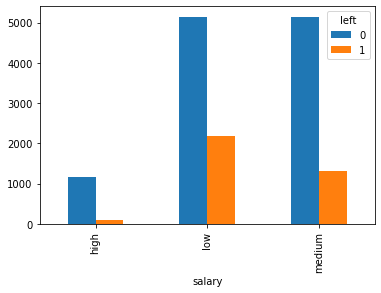

In [4]:
salarywise = pd.crosstab(df['salary'], df['left'])
salarywise.plot(kind='bar');

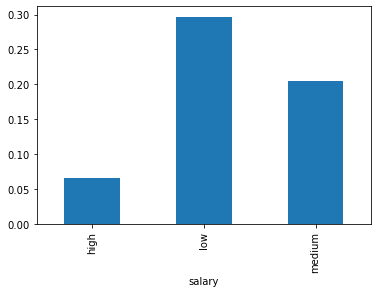

In [5]:
salary_percentage_leavers = (salarywise[1] / (salarywise[0] + salarywise[1]))
salary_percentage_leavers.plot(kind='bar');

### Impat of department on retention

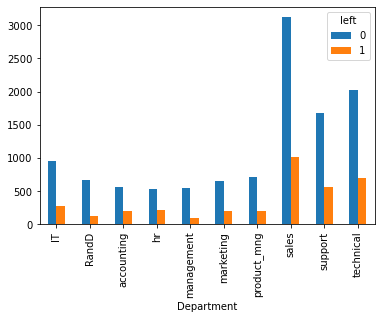

In [6]:
deptwise = pd.crosstab(df['Department'], df['left'])
deptwise.plot(kind='bar');

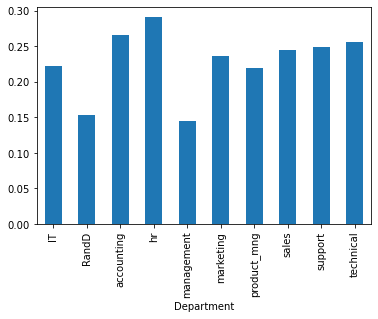

In [7]:
dept_percentage_leavers = deptwise[1] / (deptwise[0] + deptwise[1])
dept_percentage_leavers.plot(kind='bar');

### Logistic Regression

In [8]:
dataset = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
dataset.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [9]:
dummies = pd.get_dummies(dataset['salary'], prefix='salary', drop_first=True)
dummies.head()

,salary_low,salary_medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [10]:
X = pd.concat([dataset, dummies], axis='columns')
X.drop(columns='salary', inplace=True)
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0


In [11]:
y = df['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test)

(11999, 3000)

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
model.score(X_test, y_test)

0.7773333333333333